# QB Dataset Analaysis

We will first explore the quarterback dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data frames
df = pd.read_csv('qb.csv')

In [3]:
df.head()

Player   Tm  Age  G_P  GS  Att_R_P  Yds_R_P  TD_R_P  1D_R  Succ%_R  \
0      Tim Tebow  DEN   23    9   3       43      227       6    12     51.2   
1     Colt McCoy  CLE   24    8   8       28      136       1    10     53.6   
2   Sam Bradford  STL   23   16  16       27       63       1     6     29.6   
3  Jimmy Clausen  CAR   23   13  10       23       57       0     3     17.4   
4       Max Hall  ARI   25    6   3        1       -5       0     0      0.0   

   ...      School  Height  Weight  40yd  Vertical  Broad Jump  3Cone  \
0  ...     Florida     6-3   236.0  4.71      38.5       115.0   6.66   
1  ...       Texas     6-1   216.0  4.79      32.0       114.0   7.05   
2  ...    Oklahoma     6-4   236.0  4.79      32.0       114.0   7.05   
3  ...  Notre Dame     6-3   222.0  4.76      32.0       114.0   7.05   
4  ...         BYU     6-1   209.0  4.84      32.0       102.0   7.07   

   Shuttle  Drafted  OvrPick  
0    4.170     True     25.0  
1    4.285     True    149.0  
2    4.285     True      1.0  
3    4.285     True     80.0  
4    4.350    False    225.0  

[5 rows x 59 columns]

In [5]:
df.columns

Index(['Player', 'Tm', 'Age', 'G_P', 'GS', 'Att_R_P', 'Yds_R_P', 'TD_R_P',
       '1D_R', 'Succ%_R', 'Y/A_R_P', 'Y/G_R', 'Fmb', 'Cmp_P', 'Att_P', 'Pct_P',
       'Yds_P', 'TD_P', 'TD%', 'Int_P', 'Int%', '1D', 'Succ%', 'Y/A_P',
       'AY/A_P', 'Y/C', 'Y/G', 'Rate_P', 'QBR', 'Sk', 'SackYds', 'Sk%', 'NY/A',
       'ANY/A', 'G', 'Cmp', 'Att', 'Pct', 'Yds', 'Y/A', 'AY/A', 'TD', 'Int',
       'Rate', 'Att_R', 'Yds_R', 'Avg_R', 'TD_R', 'Conf', 'School', 'Height',
       'Weight', '40yd', 'Vertical', 'Broad Jump', '3Cone', 'Shuttle',
       'Drafted', 'OvrPick'],
      dtype='object')

Let's first take away all the columns of professional stats that we are not trying to predict.

In [6]:
df = df.drop(columns=['G_P', 'GS', 'Att_R_P',
       '1D_R', 'Succ%_R', 'Y/A_R_P', 'Y/G_R', 'Fmb', 'Cmp_P', 'Att_P', 
       'TD%', 'Int%', '1D', 'Succ%', 'Y/A_P',
       'AY/A_P', 'Y/C', 'Y/G',  'Sk', 'SackYds', 'Sk%', 'NY/A',
       'ANY/A'])

In [7]:
df.columns

Index(['Player', 'Tm', 'Age', 'Yds_R_P', 'TD_R_P', 'Pct_P', 'Yds_P', 'TD_P',
       'Int_P', 'Rate_P', 'QBR', 'G', 'Cmp', 'Att', 'Pct', 'Yds', 'Y/A',
       'AY/A', 'TD', 'Int', 'Rate', 'Att_R', 'Yds_R', 'Avg_R', 'TD_R', 'Conf',
       'School', 'Height', 'Weight', '40yd', 'Vertical', 'Broad Jump', '3Cone',
       'Shuttle', 'Drafted', 'OvrPick'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      84 non-null     object 
 1   Tm          84 non-null     object 
 2   Age         84 non-null     int64  
 3   Yds_R_P     84 non-null     int64  
 4   TD_R_P      84 non-null     int64  
 5   Pct_P       84 non-null     float64
 6   Yds_P       84 non-null     int64  
 7   TD_P        84 non-null     int64  
 8   Int_P       84 non-null     int64  
 9   Rate_P      84 non-null     float64
 10  QBR         84 non-null     float64
 11  G           84 non-null     float64
 12  Cmp         84 non-null     float64
 13  Att         84 non-null     float64
 14  Pct         84 non-null     float64
 15  Yds         84 non-null     float64
 16  Y/A         84 non-null     float64
 17  AY/A        84 non-null     float64
 18  TD          84 non-null     float64
 19  Int         84 non-null     flo

I also want to convert height to a numeric variable

In [10]:
df['Height'].head()

0    6-3
1    6-1
2    6-4
3    6-3
4    6-1
Name: Height, dtype: object

In [11]:
# Function to convert height from 'feet-inches' to inches
def height_to_inches(height):
    feet, inches = height.split('-')
    return int(feet) * 12 + int(inches)

# Apply the function to the Height column
df['Height'] = df['Height'].apply(height_to_inches)
df['Height'].head()

0    75
1    73
2    76
3    75
4    73
Name: Height, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      84 non-null     object 
 1   Tm          84 non-null     object 
 2   Age         84 non-null     int64  
 3   Yds_R_P     84 non-null     int64  
 4   TD_R_P      84 non-null     int64  
 5   Pct_P       84 non-null     float64
 6   Yds_P       84 non-null     int64  
 7   TD_P        84 non-null     int64  
 8   Int_P       84 non-null     int64  
 9   Rate_P      84 non-null     float64
 10  QBR         84 non-null     float64
 11  G           84 non-null     float64
 12  Cmp         84 non-null     float64
 13  Att         84 non-null     float64
 14  Pct         84 non-null     float64
 15  Yds         84 non-null     float64
 16  Y/A         84 non-null     float64
 17  AY/A        84 non-null     float64
 18  TD          84 non-null     float64
 19  Int         84 non-null     flo

Now I want to see the relationship between every pair of numeric variables in the dataset

In [14]:
sns.pairplot(df.drop(columns=['Player', 'Tm', 'Conf', 'School', 'Drafted']))
plt.show()

We have so many numeric variables that this isn't particularly helpful to look at. We can also identify correlations between metrics using a heatmap.

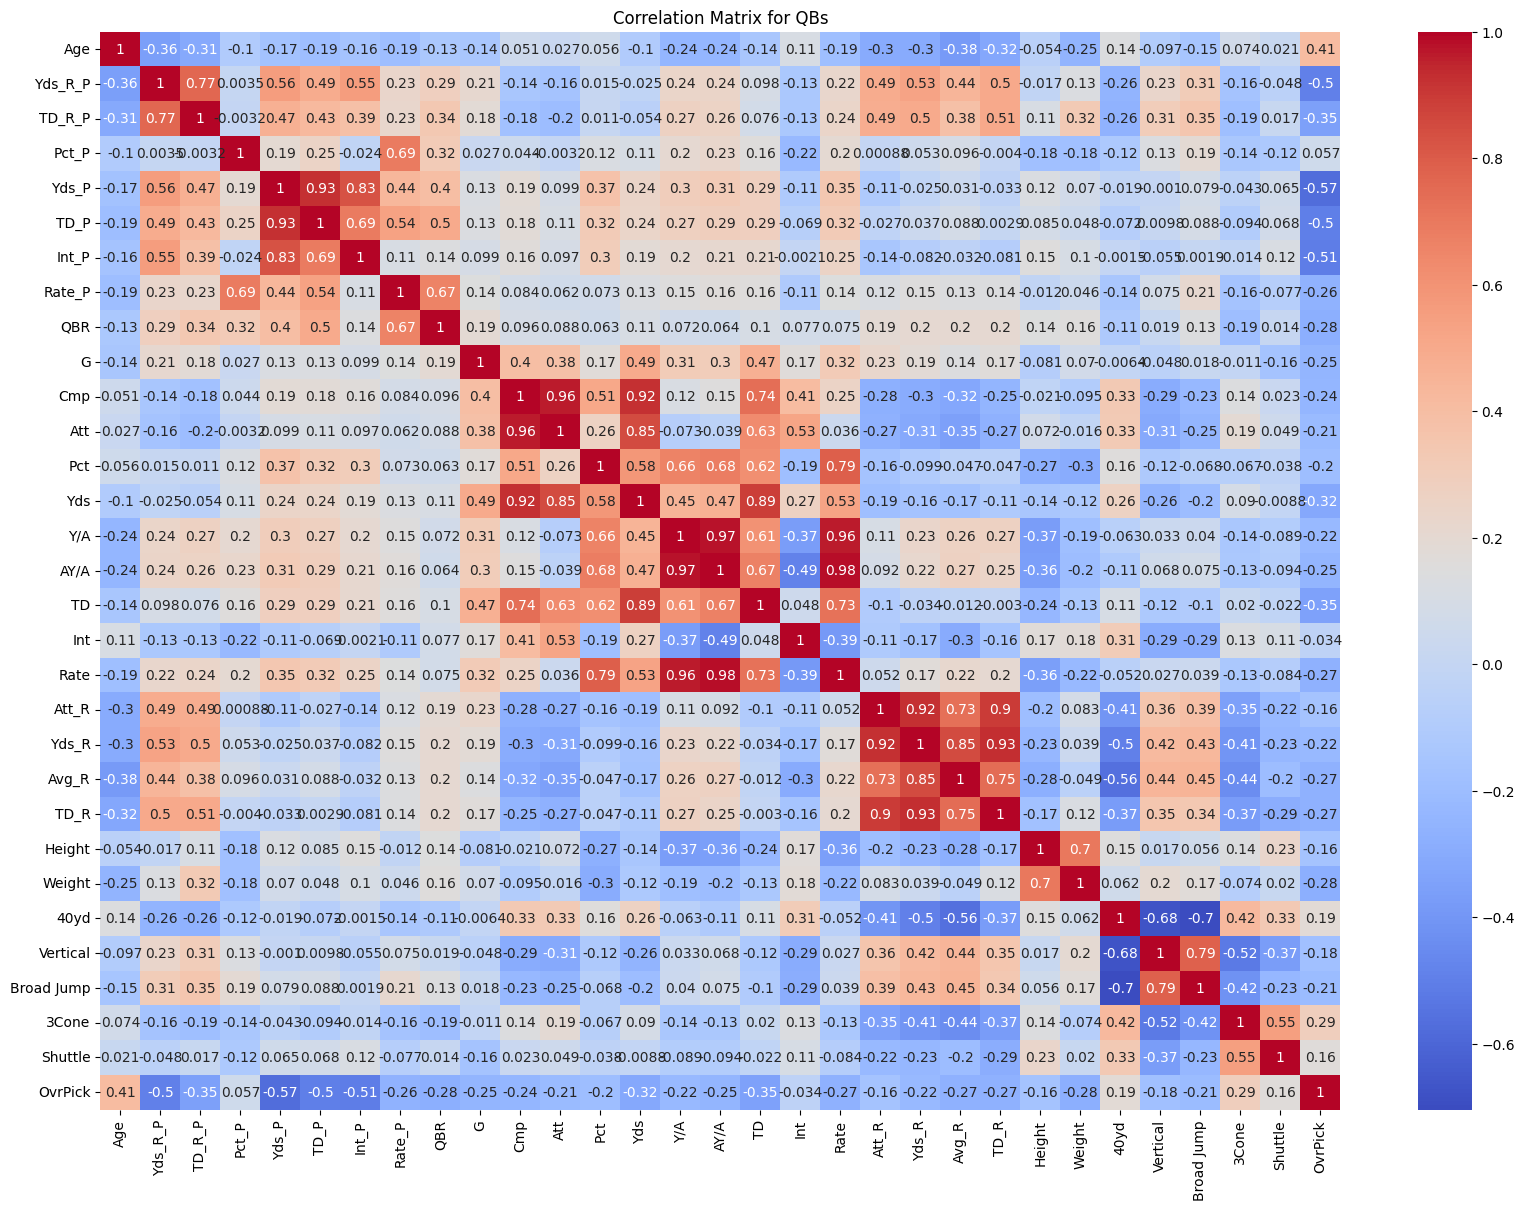

In [19]:
corr = df.drop(columns=['Player', 'Tm', 'Conf', 'School', 'Drafted']).corr()
plt.figure(figsize=(20, 14))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for QBs')
plt.show()

This makes it much more clear to see correlations. Looking for darker colors, we can tell two variables that are correlated. Some are obvious like rushing attempts and rushing touchdowns having a correlation of 0.9. We can see there could be some issues with multicollinearity among predictive variables. Also, there doesn't seem to be any very significant correlations between our response variables and predictors. The highest correlations around 0.5 are between touchdowns in college and professional, and overall pick with yards.

I now want to take a look at some of the categorical variables. Let's see the relationship between college conference and professional passing yards.

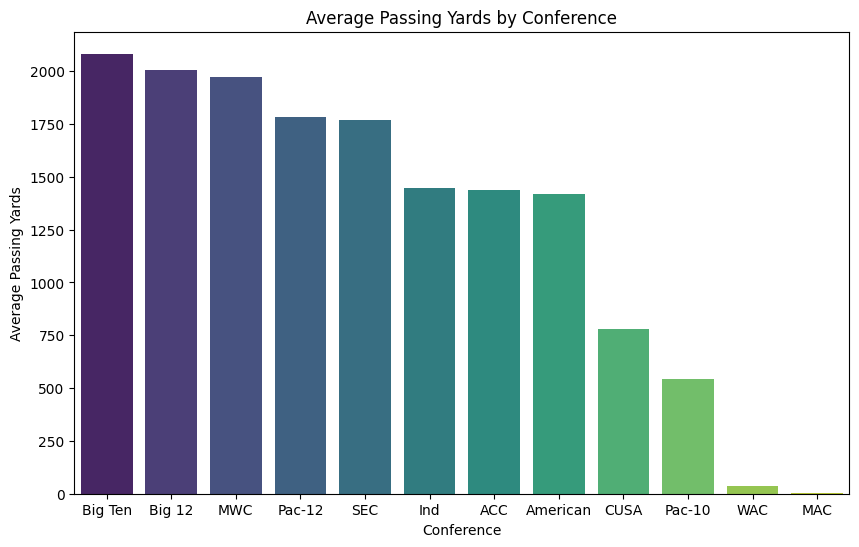

In [28]:
# Group by conference and average the passing yards
conf_passing_yards = df.groupby('Conf')['Yds_P'].mean().reset_index()

# Sort the DataFrame by passing yards for better visualization
conf_passing_yards = conf_passing_yards.sort_values('Yds_P', ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Conf', y='Yds_P', data=conf_passing_yards, palette='viridis')

# Add titles and labels
plt.title('Average Passing Yards by Conference')
plt.xlabel('Conference')
plt.ylabel('Average Passing Yards')

# Show the plot
plt.show()

It looks like among major conferences, rookie qbs have much more yards on average than lesser known conferences for football.

Let's take a look now at the relationship between the average QBR and whether the player was drafted or not, to see the importance of being drafted highly on performance.

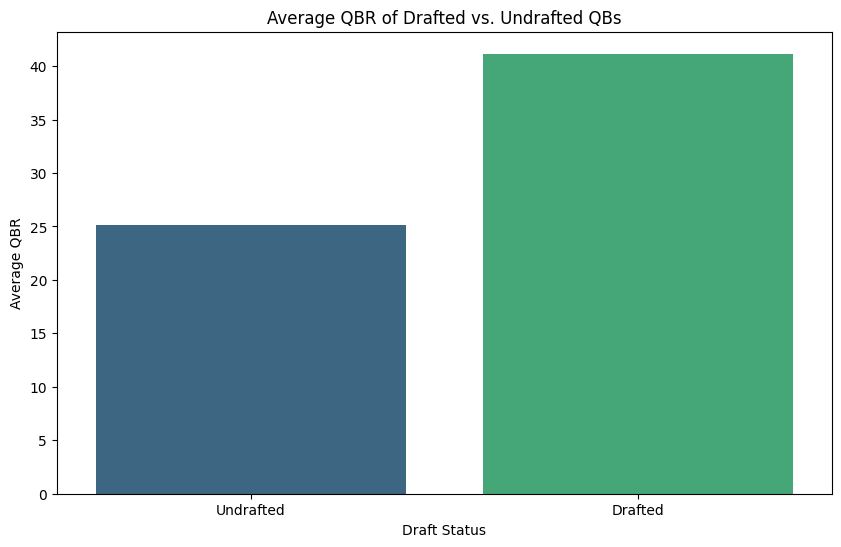

In [27]:
# Group by the 'Drafted' column and calculate the average QBR for each group
avg_qbr_by_drafted = df.groupby('Drafted')['QBR'].mean().reset_index()

# Rename the 'Drafted' column for better readability in the plot
avg_qbr_by_drafted['Drafted'] = avg_qbr_by_drafted['Drafted'].map({True: 'Drafted', False: 'Undrafted'})

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Drafted', y='QBR', data=avg_qbr_by_drafted, palette='viridis')

# Add titles and labels
plt.title('Average QBR of Drafted vs. Undrafted QBs')
plt.xlabel('Draft Status')
plt.ylabel('Average QBR')

# Show the plot
plt.show()

The QBR average is clearly higher for drafted QBs, but the difference is not as high as I would have suspected.